<a href="https://colab.research.google.com/github/fahaerte/LSIES-FinalAssignment/blob/main/Task3_SVDs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Execute the following cell to connect your google drive to the colab. Needed to load the data stored on your personal google drive. In case you use a local environment just comment out the following lines of code.

In [1]:
# Environment variables
drive = True
install_packages = True

# If necessary, install packages
if install_packages:
  !pip install Basemap basemap-data-hires
  !pip install pandas matplotlib numpy
  !pip install sklearn
  !pip install datetime

# Imports
import os
import pandas as pd
import numpy as np
from csv import reader
from sklearn.metrics import r2_score
from datetime import datetime
from datetime import timedelta as tdelta
from datetime import time as time
import random
import warnings

# Mount drive if needed
if drive:
  from google.colab import drive
  drive.mount('/content/drive')
  %cd /content/drive/MyDrive/Colab\ Notebooks/LSIES

from Helper_funcs import *
from SensorPositions_Func import *
from SVD_Func import *

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# Depending on the environemnt, set directory to data
if drive:
  dir_path = '/content/drive/MyDrive/data/'
else :
  dir_path = './data/'

folders = ['region_1_mustamäe_kristiine', 'region_2_data_kesklinn', 'region_3_kadriorg_lasnamäe', 'region_4_ülemiste']
csv_file_name_sensor_positions = 'sensor_positions.csv'
columns_sensors_positions = ['sensor_name', 'latitude', 'longitude', 'region']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/LSIES


In [2]:
#Import data
df_data_linear = pd.read_csv(dir_path + 'interpolated_data_1.csv')
df_data_linear.drop('Unnamed: 0.1', axis=1, inplace=True)
df_data_linear['Unnamed: 0'] = df_data_linear.apply(lambda row: datetime.strptime(row['Unnamed: 0'], '%Y-%m-%d %H:%M:%S'), axis=1)
df_data_linear.set_index('Unnamed: 0', inplace=True)
df_data_linear.index.name = None

In [3]:
# Compute indices of timestamps
day_index = compute_period_indices(df_data_linear, '07:00', '19:00')
evening_index = compute_period_indices(df_data_linear, '19:00', '23:00')
night_index = compute_period_indices(df_data_linear, '23:00', '7:00')

In [4]:
# Compute sensor regions
sensor_positions_df = import_sensor_positions(dir_path, csv_file_name_sensor_positions)
sensors_region1, sensors_region2, sensors_region3, sensors_region4 = get_sensors_based_on_region(sensor_positions_df)
del sensor_positions_df, csv_file_name_sensor_positions

In [ ]:
# Compute global SVDs
df_without_timestamp = df_data_linear.reset_index().iloc[:, 1:len(df_data_linear.columns)+1]
U_global, s_global, Vt_global = np.linalg.svd(df_without_timestamp)
del df_without_timestamp

In [ ]:
# Compute RMSE and SingVal based on time period for Global SVD
rmse_list_day, amount_sing_values_day = calc_RMSE_sinVal_based_on_time_period(U_global, s_global, Vt_global, df_data_linear, day_index)
rmse_list_evening, amount_sing_values_evening = calc_RMSE_sinVal_based_on_time_period(U_global, s_global, Vt_global, df_data_linear, evening_index)
rmse_list_night, amount_sing_values_night = calc_RMSE_sinVal_based_on_time_period(U_global, s_global, Vt_global, df_data_linear, night_index)

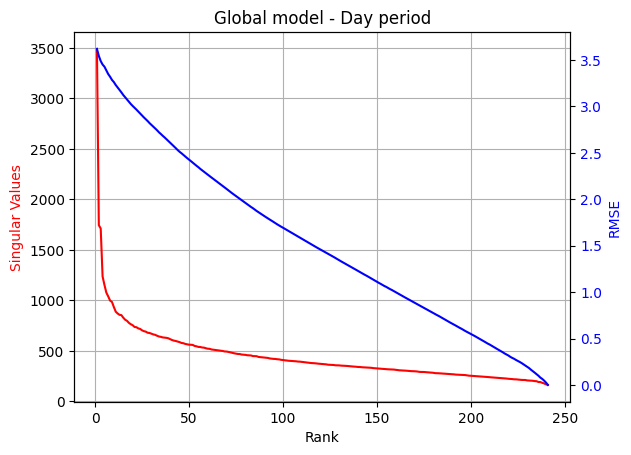

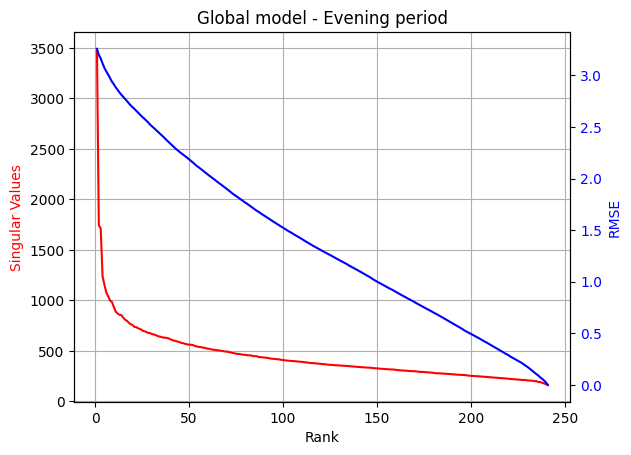

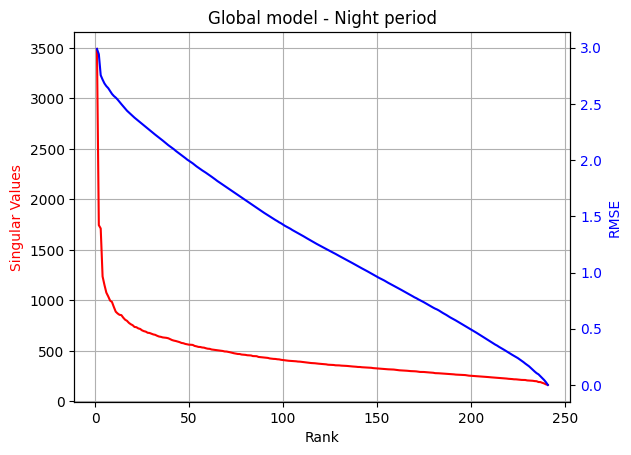

In [ ]:
# Plot RMSE and Singular Values of global SVD
plot_rmse_sinval(rmse_list_day, amount_sing_values_day, 'Global model - Day period')
plot_rmse_sinval(rmse_list_evening, amount_sing_values_evening, 'Global model - Evening period')
plot_rmse_sinval(rmse_list_night, amount_sing_values_night, 'Global model - Night period')

In [ ]:
# Collect garbage
del rmse_list_day, amount_sing_values_day, rmse_list_evening, amount_sing_values_evening, rmse_list_night, amount_sing_values_night

In [ ]:
# Compute SVDs for region 1
U_reg1, s_reg1, Vt_reg1 = np.linalg.svd(df_data_linear[sensors_region1])

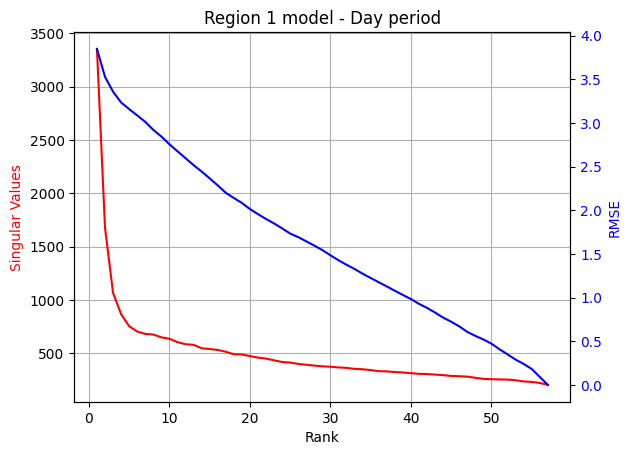

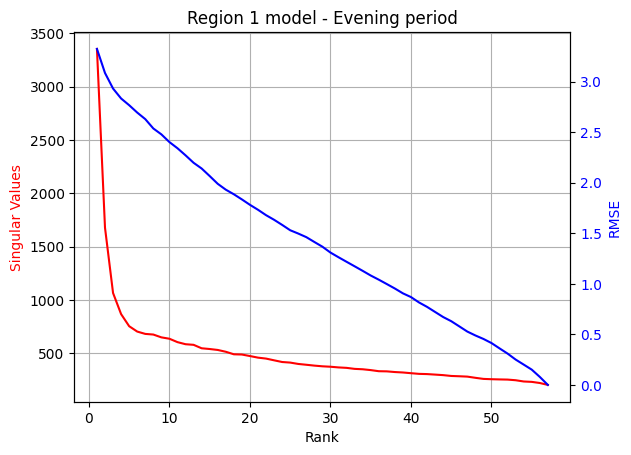

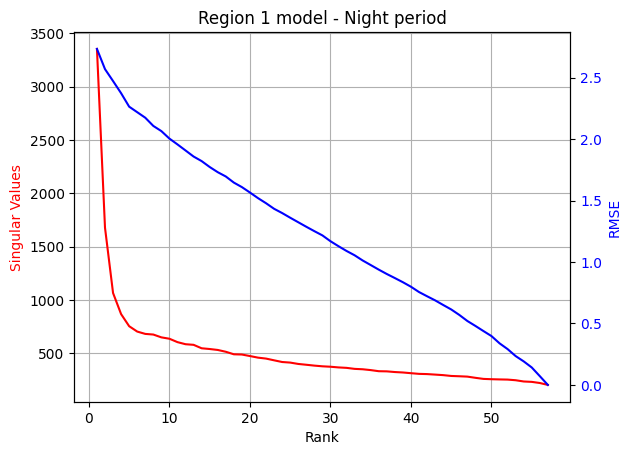

In [ ]:
# Region 1
rmse_list_day_reg1, amount_sing_values_day_reg1 = calc_RMSE_sinVal_based_on_time_period(U_reg1, s_reg1, Vt_reg1, df_data_linear[sensors_region1], day_index)
rmse_list_evening_reg1, amount_sing_values_evening_reg1 = calc_RMSE_sinVal_based_on_time_period(U_reg1, s_reg1, Vt_reg1, df_data_linear[sensors_region1], evening_index)
rmse_list_night_reg1, amount_sing_values_night_reg1 = calc_RMSE_sinVal_based_on_time_period(U_reg1, s_reg1, Vt_reg1, df_data_linear[sensors_region1], night_index)

# Plot region 1
plot_rmse_sinval(rmse_list_day_reg1, amount_sing_values_day_reg1, 'Region 1 model - Day period')
plot_rmse_sinval(rmse_list_evening_reg1, amount_sing_values_evening_reg1, 'Region 1 model - Evening period')
plot_rmse_sinval(rmse_list_night_reg1, amount_sing_values_night_reg1, 'Region 1 model - Night period')

del rmse_list_day_reg1, rmse_list_evening_reg1, rmse_list_night_reg1, amount_sing_values_day_reg1, amount_sing_values_evening_reg1, amount_sing_values_night_reg1

In [9]:
# Compute SVDs for region 2
U_reg2, s_reg2, Vt_reg2 = np.linalg.svd(df_data_linear[sensors_region2])

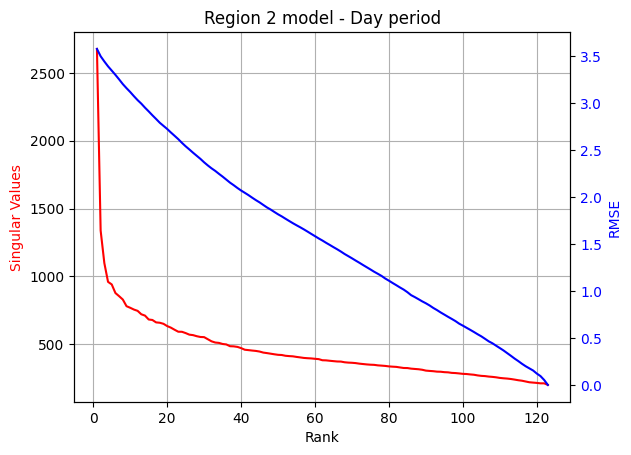

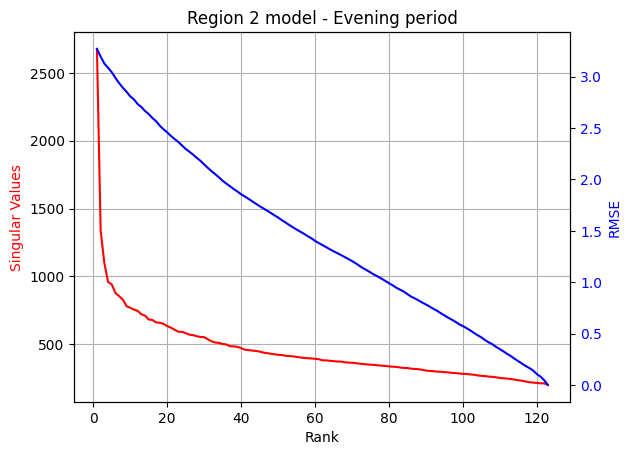

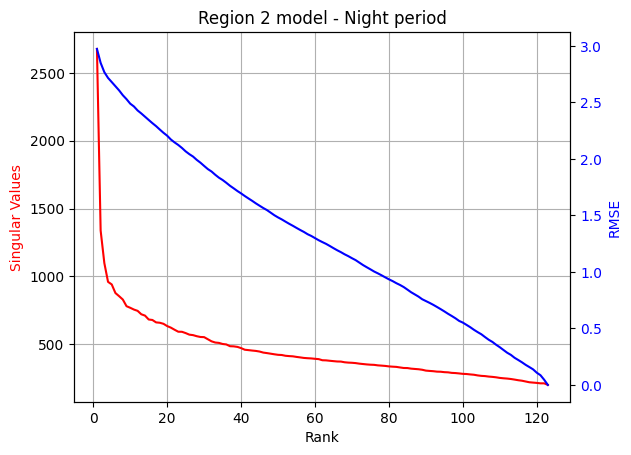

In [10]:
# Region 2
rmse_list_day_reg2, amount_sing_values_day_reg2 = calc_RMSE_sinVal_based_on_time_period(U_reg2, s_reg2, Vt_reg2, df_data_linear[sensors_region2], day_index)
rmse_list_evening_reg2, amount_sing_values_evening_reg2 = calc_RMSE_sinVal_based_on_time_period(U_reg2, s_reg2, Vt_reg2, df_data_linear[sensors_region2], evening_index)
rmse_list_night_reg2, amount_sing_values_night_reg2 = calc_RMSE_sinVal_based_on_time_period(U_reg2, s_reg2, Vt_reg2, df_data_linear[sensors_region2], night_index)

# Plot region 2
plot_rmse_sinval(rmse_list_day_reg2, amount_sing_values_day_reg2, 'Region 2 model - Day period')
plot_rmse_sinval(rmse_list_evening_reg2, amount_sing_values_evening_reg2, 'Region 2 model - Evening period')
plot_rmse_sinval(rmse_list_night_reg2, amount_sing_values_night_reg2, 'Region 2 model - Night period')

del rmse_list_day_reg2, rmse_list_evening_reg2, rmse_list_night_reg2, amount_sing_values_day_reg2, amount_sing_values_evening_reg2, amount_sing_values_night_reg2

In [5]:
# Compute SVDs for region 3
U_reg3, s_reg3, Vt_reg3 = np.linalg.svd(df_data_linear[sensors_region3])

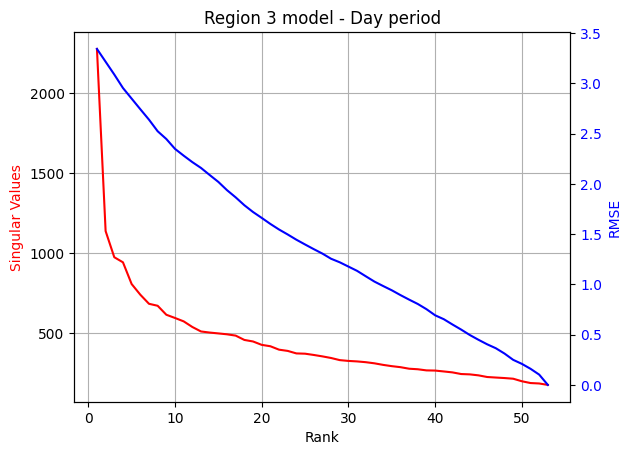

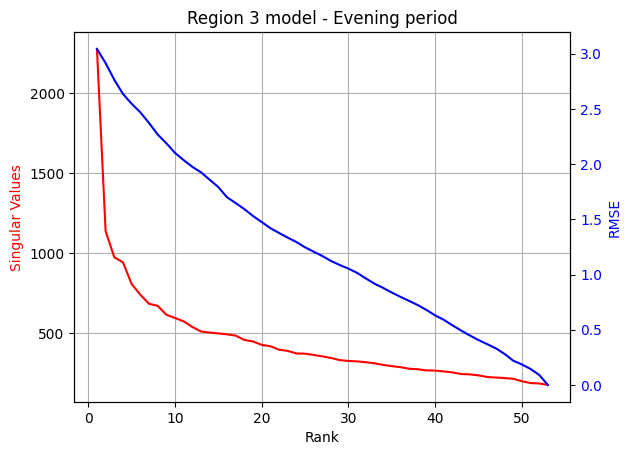

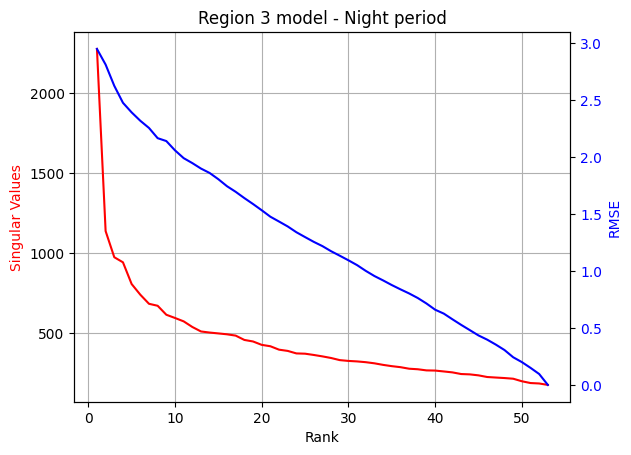

In [6]:
# Region 3
rmse_list_day_reg3, amount_sing_values_day_reg3 = calc_RMSE_sinVal_based_on_time_period(U_reg3, s_reg3, Vt_reg3, df_data_linear[sensors_region3], day_index)
rmse_list_evening_reg3, amount_sing_values_evening_reg3 = calc_RMSE_sinVal_based_on_time_period(U_reg3, s_reg3, Vt_reg3, df_data_linear[sensors_region3], evening_index)
rmse_list_night_reg3, amount_sing_values_night_reg3 = calc_RMSE_sinVal_based_on_time_period(U_reg3, s_reg3, Vt_reg3, df_data_linear[sensors_region3], night_index)

# Plot region 3
plot_rmse_sinval(rmse_list_day_reg3, amount_sing_values_day_reg3, 'Region 3 model - Day period')
plot_rmse_sinval(rmse_list_evening_reg3, amount_sing_values_evening_reg3, 'Region 3 model - Evening period')
plot_rmse_sinval(rmse_list_night_reg3, amount_sing_values_night_reg3, 'Region 3 model - Night period')

del rmse_list_day_reg3, rmse_list_evening_reg3, rmse_list_night_reg3, amount_sing_values_day_reg3, amount_sing_values_evening_reg3, amount_sing_values_night_reg3

In [7]:
# Compute SVDs for region 4
U_reg4, s_reg4, Vt_reg4 = np.linalg.svd(df_data_linear[sensors_region4])

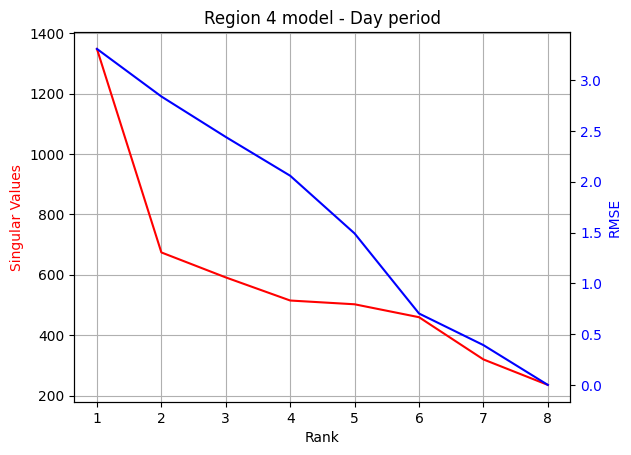

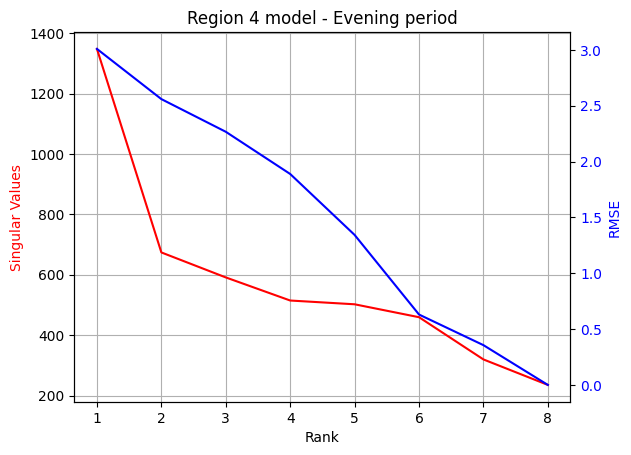

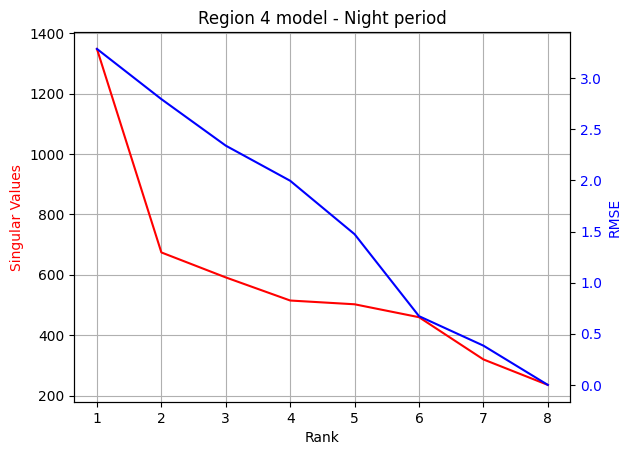

In [8]:
# Region 4
rmse_list_day_reg4, amount_sing_values_day_reg4 = calc_RMSE_sinVal_based_on_time_period(U_reg4, s_reg4, Vt_reg4, df_data_linear[sensors_region4], day_index)
rmse_list_evening_reg4, amount_sing_values_evening_reg4 = calc_RMSE_sinVal_based_on_time_period(U_reg4, s_reg4, Vt_reg4, df_data_linear[sensors_region4], evening_index)
rmse_list_night_reg4, amount_sing_values_night_reg4 = calc_RMSE_sinVal_based_on_time_period(U_reg4, s_reg4, Vt_reg4, df_data_linear[sensors_region4], night_index)

# Plot region 4
plot_rmse_sinval(rmse_list_day_reg4, amount_sing_values_day_reg4, 'Region 4 model - Day period')
plot_rmse_sinval(rmse_list_evening_reg4, amount_sing_values_evening_reg4, 'Region 4 model - Evening period')
plot_rmse_sinval(rmse_list_night_reg4, amount_sing_values_night_reg4, 'Region 4 model - Night period')

del rmse_list_day_reg4, rmse_list_evening_reg4, rmse_list_night_reg4, amount_sing_values_day_reg4, amount_sing_values_evening_reg4, amount_sing_values_night_reg4

In [5]:
sampling_sizes = [0.2, 0.3, 0.4, 0.5]
start_time = datetime.strptime('2022.08.01 00:00:00', '%Y.%m.%d %H:%M:%S')
end_time = datetime.strptime('2022.08.13 23:59:00', '%Y.%m.%d %H:%M:%S')

samples = [random_walk_uni(int(df_data_linear.shape[0] * s), 0, 1) for s in sampling_sizes]
sample_dfs = []

time_diff = end_time - start_time

# Scale the random walk values to the time range
for sample in samples:
  time_values = start_time + (time_diff * sample)
  time_values = [timestamp.replace(second=0).replace(microsecond=0) for timestamp in time_values]
  sample_dfs.append(pd.DataFrame({"Timestamp": time_values}))

In [6]:
chosen_sensors = ['237B', '23B1','22CC', '2329']
for df in sample_dfs:
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
  df = df.merge(df_data_linear[chosen_sensors], how='inner', left_on = 'Timestamp', right_index=True)

In [7]:
# Pick 4 stations and apply the different SVD models
stat_list = [
    {'id': '237B', 'region': 1, 'real_data': df_data_linear[chosen_sensors[0]]},
    {'id': '23B1', 'region': 2, 'real_data': df_data_linear[chosen_sensors[1]]},
    {'id': '22CC', 'region': 3, 'real_data': df_data_linear[chosen_sensors[2]]},
    {'id': '2329', 'region': 4, 'real_data': df_data_linear[chosen_sensors[3]]}
]

# Compute global SVDs
df_without_timestamp = df_data_linear.reset_index().iloc[:, 1:len(df_data_linear.columns)+1]
U_global, s_global, Vt_global = np.linalg.svd(df_without_timestamp)
s_global = keep_low_rank_model_of_svd(df=df_data_linear, s=s_global, rank=105) # RMSE approx 1.5 with a rank of 110

for stat in stat_list:
  stat['recon_global'] = apply_svd(df_data_linear, stat['id'], U_global, s_global, Vt_global)
  # stat = compare_results(stat, 'comp_to_global', stat['real_data'], stat['recon_global'])

del df_without_timestamp, U_global, s_global, Vt_global

# Compute SVDs for region 1
U_reg1, s_reg1, Vt_reg1 = np.linalg.svd(df_data_linear[sensors_region1])
s_reg1 = keep_low_rank_model_of_svd(df=df_data_linear[sensors_region1], s=s_reg1, rank=38) # RMSE approx 1 with a rank of 40
stat_list[0]['recon_reg'] = apply_svd(df_data_linear[sensors_region1], stat_list[0]['id'], U_reg1, s_reg1, Vt_reg1)

del U_reg1, s_reg1, Vt_reg1

# Compute SVDs for region 2
U_reg2, s_reg2, Vt_reg2 = np.linalg.svd(df_data_linear[sensors_region2])
s_reg2 = keep_low_rank_model_of_svd(df=df_data_linear[sensors_region2], s=s_reg2, rank=82) # RMSE approx 1 with a rank of 83
stat_list[1]['recon_reg'] = apply_svd(df_data_linear[sensors_region2], stat_list[1]['id'], U_reg2, s_reg2, Vt_reg2)

del U_reg2, s_reg2, Vt_reg2

# Compute SVDs for region 3
U_reg3, s_reg3, Vt_reg3 = np.linalg.svd(df_data_linear[sensors_region3])
s_reg3 = keep_low_rank_model_of_svd(df=df_data_linear[sensors_region3], s=s_reg3, rank=33) # RMSE approx 1 with a rank of 35
stat_list[2]['recon_reg'] = apply_svd(df_data_linear[sensors_region3], stat_list[2]['id'], U_reg3, s_reg3, Vt_reg3)

del U_reg3, s_reg3, Vt_reg3

# Compute SVDs for region 4
U_reg4, s_reg4, Vt_reg4 = np.linalg.svd(df_data_linear[sensors_region4])
s_reg4 = keep_low_rank_model_of_svd(df=df_data_linear[sensors_region4], s=s_reg4, rank=6) # RMSE approx 1 with a rank of 6
stat_list[3]['recon_reg'] = apply_svd(df_data_linear[sensors_region4], stat_list[3]['id'], U_reg4, s_reg4, Vt_reg4)

del U_reg4, s_reg4, Vt_reg4

In [8]:
entries = []
for stat in stat_list:
  sensor_df = pd.DataFrame(stat['real_data'])
  sensor_df['recon_global'] = stat['recon_global']
  sensor_df['recon_reg'] = stat['recon_reg']
  entry = {'id': stat['id'], 'glob_rmse': [], 'glob_mad': [], 'reg_rmse': [], 'reg_mad': []}

  for sample_df, size in zip(sample_dfs, sampling_sizes):
    sample_df = sample_df.merge(sensor_df, how='inner', left_on = 'Timestamp', right_index=True)
    glob_rmse, glob_mad = compare_results(sample_df[stat['id']], sample_df['recon_global'])
    reg_rmse, reg_mad = compare_results(sample_df[stat['id']], sample_df['recon_reg'])
    entry['glob_rmse'].append(glob_rmse)
    entry['glob_mad'].append(glob_mad)
    entry['reg_rmse'].append(reg_rmse)
    entry['reg_mad'].append(reg_mad)
  
  entries.append(entry)

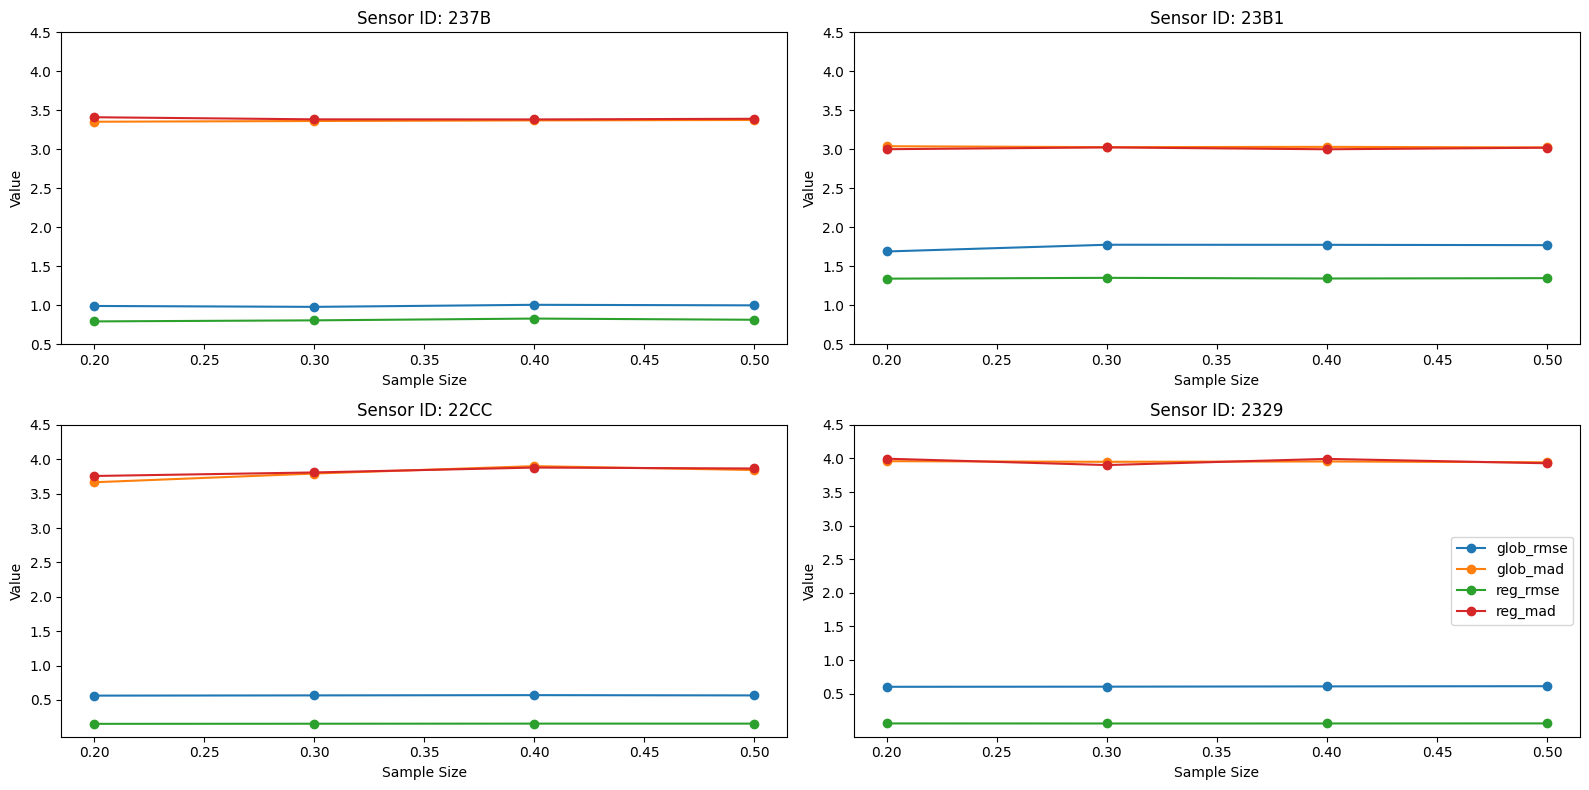

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

for entry, ax in zip(entries, axs.reshape(-1)):
    id = entry['id']
    glob_rmse = entry['glob_rmse']
    glob_mad = entry['glob_mad']
    reg_rmse = entry['reg_rmse']
    reg_mad = entry['reg_mad']

    ax.plot(sampling_sizes, glob_rmse, marker='o', label='Global RMSE')
    ax.plot(sampling_sizes, glob_mad, marker='o', label='Global MAD')
    ax.plot(sampling_sizes, reg_rmse, marker='o', label='Regional RMSE')
    ax.plot(sampling_sizes, reg_mad, marker='o', label='Regional MAD')
    ax.set_xlabel('Sample Size')
    ax.set_ylabel('Value')
    ax.set_title(f'Sensor ID: {id}')
    ax.set_yticks([float(i/2) for i in range(1, 10)])


plt.legend(['glob_rmse', 'glob_mad', 'reg_rmse', 'reg_mad'])
plt.tight_layout()
plt.show()